In [ ]:
pip install pytesseract


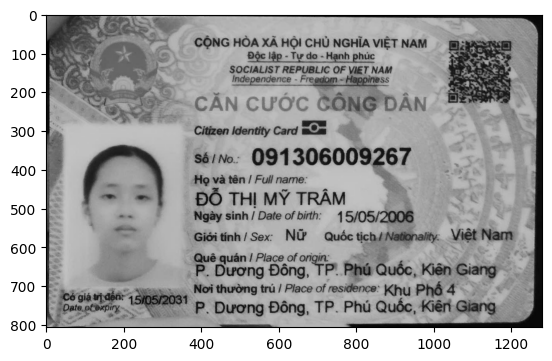

 
      
      
       
   
   
       
     
        
    

CONG HOA XA HO! CHU NGHIA VIET NAM
dc lap - Ty do - Hanh phuc
SOCIALIST REPUBLIC OF VIET NAM

CAN CUOC GONG DAN

Citizen identity Card =m

sino: 091306009267
Hg va tén / Full name: p

BO THI MY TRAM

Ngay sinh / Date of birth: 15/05/2006
Gidi tinh / Sex: NW  Quéc tich/Nationality: Viét Nam
Qué quan / Place of

P. Duong béng, TP. Pha Quéc, Kién Giang
Noi thwéng tru / Place of residence: Khy Phé 4

 'P Duong Déng, TP. Phu Quée, Kiért Giang

 

 



In [ ]:
from PIL import Image
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
filename = '/content/z6564445713331_08fb80401a176b945807b798ac25fce9.jpg'
img = plt.imread(filename)
plt.imshow(img)
plt.show()
img1 = np.array(Image.open(filename))
text = pytesseract.image_to_string(img1)

print(text)

In [ ]:
!pip install openpyxl


In [ ]:
import re
from openpyxl import Workbook

text = """
CONG HOA XA HOI CHU NGHIA VIET NAM
Doc lap - Tu do - Hanh phuc

CAN CUOC CONG DAN

Citizen Identity Card

sino: 091306009267

Hg va tén / Full name:

DO THI MY TRAM

Ngay sinh / Date of birth: 15/05/2006

Gidi tinh / Sex: Nu

Quéc tich/Nationality: Viet Nam

Qué quan / Place of birth:
Phuong Duong Dong, TP. Phu Quoc, Kien Giang

Noi thwong tru / Place of residence:
Khu Pho 4, Duong Dong, TP. Phu Quoc, Kien Giang
"""

ocr_corrections = {
    "Hg va tén": "Họ và tên",
    "Gidi tinh": "Giới tính",
    "Quéc tich": "Quốc tịch",
    "Qué quan": "Quê quán",
    "Noi thwong tru": "Nơi thường trú",
    "Nu": "Nữ",
    "sino": "Số CCCD"
}

for wrong, right in ocr_corrections.items():
    text = text.replace(wrong, right)

lines = [line.strip() for line in text.split("\n") if line.strip()]

fields = {
    "Số CCCD": "",
    "Họ và tên": "",
    "Ngày sinh": "",
    "Giới tính": "",
    "Quốc tịch": "",
    "Quê quán": "",
    "Nơi thường trú": ""
}

for i, line in enumerate(lines):
    lower_line = line.lower()

    if "số cccd" in lower_line and re.search(r"\d{12}", line):
        fields["Số CCCD"] = re.search(r"\d{12}", line).group()

    elif "họ và tên" in lower_line:
        fields["Họ và tên"] = lines[i + 1] if i + 1 < len(lines) else ""

    elif "ngay sinh" in lower_line:
        match = re.search(r"\d{2}/\d{2}/\d{4}", line)
        fields["Ngày sinh"] = match.group() if match else line.split(":")[-1].strip()

    elif "giới tính" in lower_line:
        if "nữ" in lower_line:
            fields["Giới tính"] = "Nữ"
        elif "nam" in lower_line:
            fields["Giới tính"] = "Nam"
        else:
            fields["Giới tính"] = "Không rõ"

    elif "quốc tịch" in lower_line:
        fields["Quốc tịch"] = "Việt Nam"

    elif "quê quán" in lower_line:
        fields["Quê quán"] = lines[i + 1] if i + 1 < len(lines) else ""

    elif "nơi thường trú" in lower_line:
        fields["Nơi thường trú"] = " ".join(lines[i + 1:i + 3])

wb = Workbook()
ws = wb.active
ws.title = "CCCD Info"
ws.append(list(fields.keys()))
ws.append(list(fields.values()))
wb.save("cccd_info.xlsx")

print("Đã lưu thông tin vào file: cccd_info.xlsx")


Đã lưu thông tin vào file: cccd_info.xlsx
